<a href="https://colab.research.google.com/github/RenanCostaNascimento/mestrado-redes-neurais/blob/main/3_Perceptron_Multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import label_binarize

def geradataset(tamanho=20, centros=2):
    X, y = make_blobs(n_samples=tamanho, centers=centros, center_box=(0, 1.0), cluster_std=0.05)
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotahiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)

# Funções de Custo

In [174]:
class CustoPerceptron():
  @staticmethod
  def erro(y, ypred):
    return y - ypred
  @staticmethod
  def custo(y, ypred):
    return np.sum(CustoPerceptron.erro(y, ypred)**2)
  @staticmethod
  def gradiente(y, ypred, X):
    print(X.T)
    return np.matmul(X.T, CustoPerceptron.erro(y, ypred))

class Adaline():
  def __init__(self):
    self.preactivated = True
  @staticmethod
  def erro(y, ypred):
    return y - ypred
  @staticmethod
  def custo(y, ypred):
    return np.sum((1 - Adaline.erro(y, ypred))**2)
  @staticmethod
  def gradiente(y, ypred, X):
    return np.matmul(X.T, Adaline.erro(y, ypred))

# Perceptron

In [150]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, custo=CustoPerceptron(), alpha=0.001, maxiter=200):
    self.w = None
    self.activation = lambda a: (a>=0)*2-1
    self.alpha = alpha
    self.maxiter = maxiter
    self.custo = custo
    
  @staticmethod
  def includebias(X):
    bias = np.ones((X.shape[0],1))
    Xb = np.concatenate((bias,X), axis=1)
    return Xb

  def fit(self, X, y):
    Xb = Perceptron.includebias(X)
    self.labels = list(set(y))
    if len(self.labels) > 2:
      y = label_binarize(y, classes=self.labels)*2-1
      self.w = np.random.uniform(-1, 1, size=(Xb.shape[1], y.shape[1]))
    else:
      self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.maxiter):
      a = self.preactivate(X)
      ypred = self.activation(a)
      custo = self.custo.custo(y, ypred)
      if custo == 0:
        break
      self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
  
  def preactivate(self, X):
    Xb = Perceptron.includebias(X)
    return np.matmul(Xb, self.w)

  def predict(self, X):
    a = self.preactivate(X)
    if len(self.w.shape)  > 1:
      idx = np.argmax(a, axis=1)
      ypred = np.array([self.labels[i] for i in idx])
    else:
      ypred = self.activation(a)
    return ypred

# Testes - Custo Perceptron
## Binária

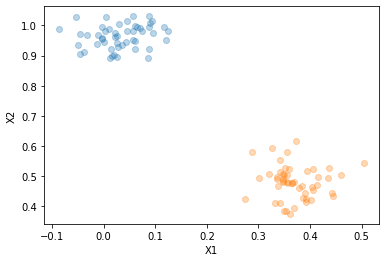

0.5
[-0.33595458 -0.49382867] 0.44488875354010465


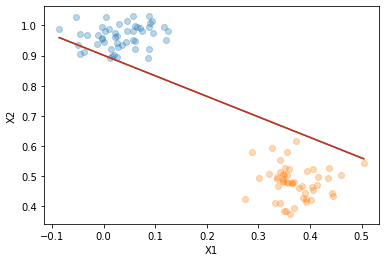

In [166]:
X, y = geradataset(100, 2)
plotadataset(X, y)
plt.show()

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):  
  if (perceptron.w.ndim > 1):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))
  else:
    plotahiperplano(perceptron.w[1:], perceptron.w[0], min(X[:,0]), max(X[:,0]))

## Multiclasse

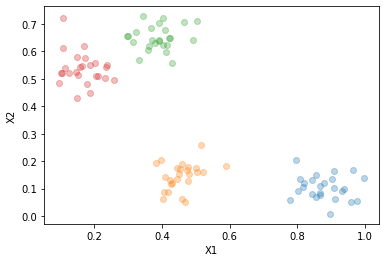

0.99
[[ 0.5365324  -0.18498324  0.11556749 -0.41426217]
 [ 0.22294975 -0.32003892  0.24104054  0.24023083]] [-0.42925685  0.16540995 -0.17971928 -0.0309051 ]


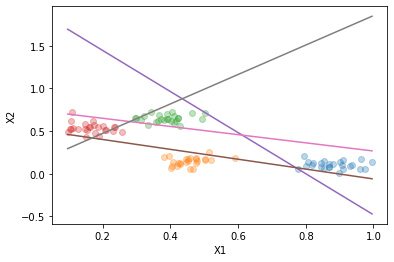

In [175]:
X, y = geradataset(100, 4)
plotadataset(X, y)
plt.show()

perceptron = Perceptron()
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):  
  if (perceptron.w.ndim > 1):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))
  else:
    plotahiperplano(perceptron.w[1:], perceptron.w[0], min(X[:,0]), max(X[:,0]))

# Testes - Custo Adaline
## Binária

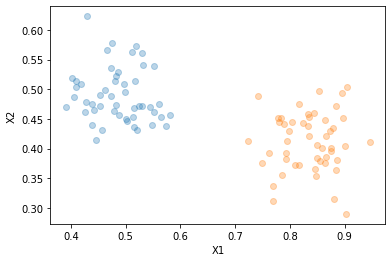

0.5
[ 0.26308743 -0.30981569] -0.011402661461453807


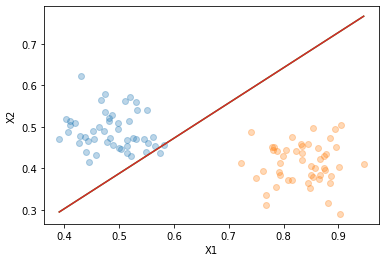

In [176]:
X, y = geradataset(100, 2)
plotadataset(X, y)
plt.show()

perceptron = Perceptron(custo=Adaline)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):  
  if (perceptron.w.ndim > 1):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))
  else:
    plotahiperplano(perceptron.w[1:], perceptron.w[0], min(X[:,0]), max(X[:,0]))

## Multiclasse

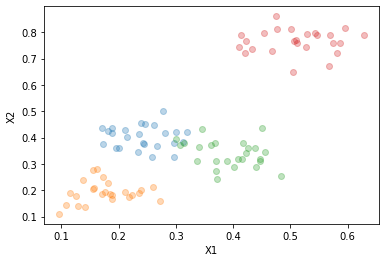

0.95
[[-0.24059682 -0.90769682  0.72455331 -0.37651106]
 [ 0.10527584 -0.66776265 -0.47706299  0.63863731]] [ 0.03712494  0.40593317 -0.0772146  -0.21488836]


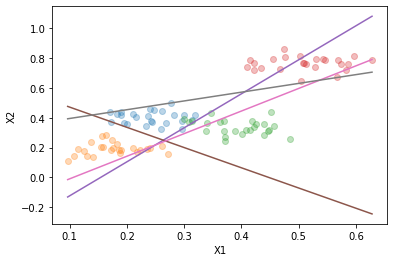

In [180]:
X, y = geradataset(100, 4)
plotadataset(X, y)
plt.show()

perceptron = Perceptron(custo=Adaline)
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))
print(perceptron.w[1:], perceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):  
  if (perceptron.w.ndim > 1):
    plotahiperplano(perceptron.w[1:,i], perceptron.w[0,i], min(X[:,0]), max(X[:,0]))
  else:
    plotahiperplano(perceptron.w[1:], perceptron.w[0], min(X[:,0]), max(X[:,0]))